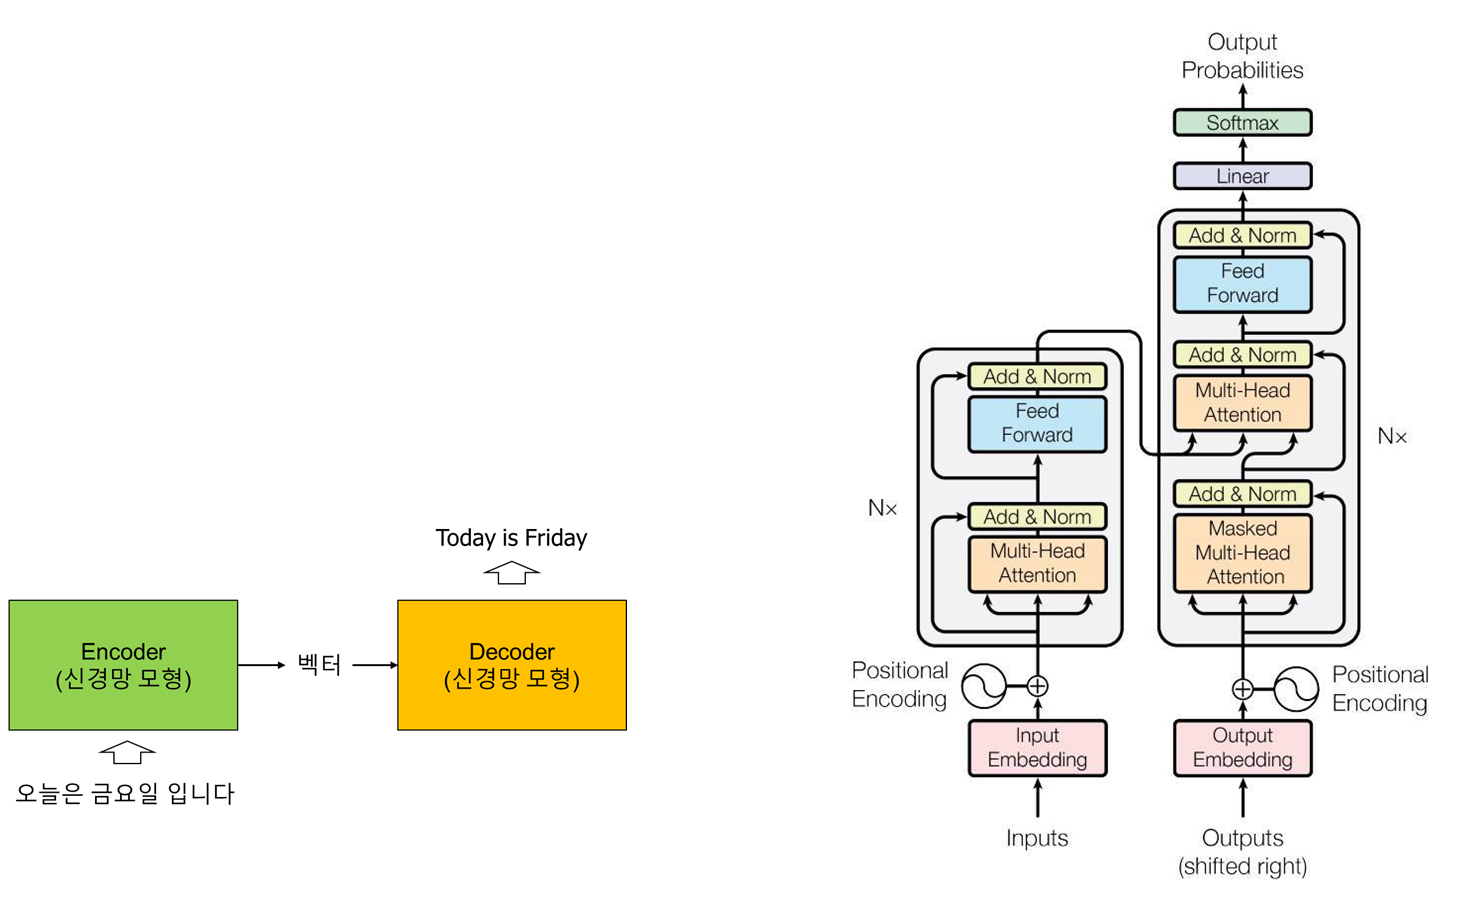

**BERTopic**
<br>
텍스트 데이터에서 토픽 추출, 시각화하는 Python 라이브러리<br>
Transformer 모델 기반<br>
대량의 문서에서 토픽을 자동으로 추출, 토픽들 사이의 관계 파악
<br><br>
**주요 기능**<br>
자동 토픽 수 검출<br>
토픽 감소: 유사한 토픽을 합치거나 너무 작은 토픽을 제거, 명확한 토픽 구조 세팅<br>
시각화
토픽 표현: 각 토픽을 대표하는 가장 중요한 단어들을 추출하여 토픽 설명<br>
동적 토픽 모델링: 시간에 따라 변하는 토픽의 트렌드를 추적

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install bertopic

In [ ]:
# BERTopic 클래스 임포트하기
from bertopic import BERTopic

import pandas as pd
import numpy as np

In [ ]:
# 데이터 읽어오기
df = pd.read_csv('/content/tokyo_2020_tweets.csv', engine='python')

# tokyo_2020_tweets.csv : 올림픽 관련 트윗 데이터

In [ ]:
len(df)

88532

In [ ]:
df=df[:6000] # 6000개의 행만 가져오기

In [ ]:
df.head()

id                        user_name   user_location  \
0  1418888645105356803               Abhishek Srivastav    Udupi, India   
1  1418888377680678918         Saikhom Mirabai Channu🇮🇳  Manipur, India   
2  1418888260886073345                     Big Breaking          Global   
3  1418888172864299008  International Hockey Federation        Lausanne   
4  1418886894478270464                     Cameron Hart       Australia   

                                    user_description         user_created  \
0               Trying to be mediocre in many things  2021-02-01 06:33:51   
1      Indian weightlifter 48 kg category. Champion🏆  2018-04-07 10:10:22   
2  All breaking news related to Financial Market....  2021-05-29 08:51:25   
3  Official International Hockey Federation Twitt...  2010-10-20 10:45:59   
4                            Football & Tennis Coach  2020-10-31 08:46:17   

  user_followers user_friends user_favourites user_verified  \
0             45           39             293         False   
1           5235            5            2969         False   
2           3646            3               5         False   
3         103975         2724           36554          True   
4              6           37              31         False   

                  date                                               text  \
0  2021-07-24 10:59:49                    Let the party begin\n#Tokyo2020   
1  2021-07-24 10:58:45  Congratulations #Tokyo2020 https://t.co/8OFKMs...   
2  2021-07-24 10:58:17  Big Breaking Now \n\nTokyo Olympic Update \n\n...   
3  2021-07-24 10:57:56  Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...   
4  2021-07-24 10:52:51  All I can think of every time I watch the ring...   

                                            hashtags               source  \
0                                      ['Tokyo2020']  Twitter for Android   
1                                      ['Tokyo2020']  Twitter for Android   
2                                                NaN  Twitter for Android   
3                                                NaN      Twitter Web App   
4  ['Tokyo2020', 'ArtisticGymnastics', '7Olympics...   Twitter for iPhone   

   retweets  favorites is_retweet  
0       0.0        0.0      False  
1       0.0        0.0      False  
2       0.0        1.0      False  
3       1.0        0.0      False  
4       0.0        0.0      False

In [ ]:
docs = df['text'].to_list() # df에서 'text' 칼럼 추출, 리스트 형태로 변환


In [ ]:
docs[:3]  # 처음 3개의 문서 확인

['Let the party begin\n#Tokyo2020',
 'Congratulations #Tokyo2020 https://t.co/8OFKMs9ukq',
 "Big Breaking Now \n\nTokyo Olympic Update \n\nJapan won his first Gold 🥇 Takato Naohisa won Gold in men's 60 kg Judo, C… https://t.co/tRcfDd7clY"]

In [ ]:
# 모델 생성
# BERTopic 클래스의 인스턴스 생성
# language='english' 영어 데이터 처리
# nr_topics='auto'토픽 수 자동 결정  cf) nr_topics=10
# calculate_probabilities=True 각 문서가 각 토픽에 속할 확률을 계산하도록 설정합니다.

model = BERTopic(language='english', nr_topics='auto', calculate_probabilities=True)



In [ ]:
# 모델 설정 내용, 하이퍼파라메터 확인
# print(vars(model))
# print(model)

In [ ]:
topics, probabilities = model.fit_transform(docs)
# 모델링 (input : 트위터 text)
# 각 문서의 topic 할당(topics)
# 각 문서가 각 topic에 속할 확률(probabilities)  리턴.

In [ ]:
topics  # 문서의 topic 할당 결과

In [ ]:
# 첫 번째 문서가 할당된  topic
topics[0]

0

In [ ]:
# topic 수
len(probabilities[0])

63

In [ ]:
probabilities[0]  # 첫 번째 문서의 각 토픽별 할당 확률

array([0.44859056, 0.00447033, 0.00135475, 0.03455158, 0.01251028,
       0.02441293, 0.00508583, 0.00674767, 0.01680968, 0.01033402,
       0.00889329, 0.00487175, 0.014314  , 0.00543021, 0.00537686,
       0.00728467, 0.01009598, 0.00766286, 0.00998265, 0.0060248 ,
       0.00525422, 0.00659332, 0.00781515, 0.00673013, 0.00637909,
       0.00401051, 0.00515915, 0.00423091, 0.01490966, 0.0064004 ,
       0.00854429, 0.00464295, 0.00796466, 0.00558418, 0.0056347 ,
       0.0085761 , 0.00736579, 0.00631956, 0.00766327, 0.00645892,
       0.00861085, 0.00764358, 0.00883134, 0.00981722, 0.00533272,
       0.00368226, 0.00570037, 0.00646446, 0.00706942, 0.00269337,
       0.01409382, 0.01553493, 0.00810089, 0.01625932, 0.01203754,
       0.02022959, 0.00728622, 0.00674183, 0.00645873, 0.00443024,
       0.02198079, 0.00871127, 0.01124756])

In [ ]:
# 가장 높은 확률 값을 가진 topic 번호
max_topic_index = np.argmax(probabilities[1])

print("topic index:", max_topic_index)
print("probabilities:", probabilities[1][max_topic_index])

topic index: 0
probabilities: 0.48784515263876316


In [ ]:
model.get_topic_info() # topic 정보 요약

# Topic: topic 고유 번호
# Count: 해당 topic에 속하는 문서 수
# Name: topic명 - topic을 대표하는 주요 단어로 단어로 구성
# Representation: topic을 가장 잘 대표하는 단어들의 리스트
# Representative_Docs: 해당 topic에 속하는 대표적인 문서들.

Topic  Count                                               Name  \
0      -1   1669                            -1_the_tokyo2020_to_for   
1       0   3068       0_mirabaichanu_tokyo2020_congratulations_for   
2       1    225                       1_vikas_boxing_krishan_round   
3       2    133                 2_badminton_tennis_doubles_singles   
4       3     77                       3_banda_barbra_hattricks_two   
5       4     69                                    4_live_11_q2_21   
6       5     62                            5_zambia_china_44_banda   
7       6     48                          6_yulo_rings_carlos_caloy   
8       7     46                         7_kerr_sam_penalty_swevaus   
9       8     42                       8_rule_remedy_butterfly_100m   
10      9     35                      9_mukherjee_sutirtha_43_linda   
11     10     34               10_puneethrajkumar_dvitva_boss_james   
12     11     32                11_manika_batra_tabletennis_singles   
13     12     31            12_selflove_etsy_saturdaythoughts_sales   
14     13     29                     13_basketball_3x3_latvia_rules   
15     14     29                        14_penalty_ref_foul_swevaus   
16     15     25                        15_matildas_sweden_42_goals   
17     16     22                              16_ying_peng_liu_chan   
18     17     22  17_mediasai_iosindiaoff_imrahultrehan_virenras...   
19     18     21             18_matildas_swevaus_fark_tokyotogether   
20     19     20                         19_seto_shock_swimming_out   
21     20     20                       20_archery_korea_mixed_event   
22     21     20                   21_foroughi_irans_javad_shooting   
23     22     19        22_covid19_allowed_northernassist_pingdemic   
24     23     19                          23_pistol_10m_7th_saurabh   
25     24     18                      24_spain_waterpolo_south_polo   
26     25     16           25_volleyball_errors_shing_ranvolley0902   
27     26     15                         26_hend_zaza_youngest_shes   
28     27     15         27_transformed_display_yourself_absolutely   
29     28     14                      28_happier_asked_elated_could   
30     29     13            29_realgoldeninu_term_roadmap_potential   
31     30     13                          30_jobs_vacancy_ngo_daily   
32     31     12  31_italianteam_giannimoscon_olimpiadi_trattore...   
33     32     12                      32_fencing_samele_126_wouldve   
34     33     12            33_movies_hollywoodciak_celebrate_sport   
35     34     11                34_caloy_go_lets_httpstconphxwfsnub   
36     35     11                  35_netherlands_brazil_aniek_group   
37     36     11                    36_adam_peaty_pool_breaststroke   
38     37     10                     37_sports_winter_love_olympics   

                                       Representation  \
0   [the, tokyo2020, to, for, and, of, olympics, i...   
1   [mirabaichanu, tokyo2020, congratulations, for...   
2   [vikas, boxing, krishan, round, okazawa, loses...   
3   [badminton, tennis, doubles, singles, pair, ch...   
4   [banda, barbra, hattricks, two, barbara, games...   
5   [live, 11, q2, 21, ger, follow, canada, scorec...   
6   [zambia, china, 44, banda, wang, shuang, goals...   
7   [yulo, rings, carlos, caloy, 14000, artistic, ...   
8   [kerr, sam, penalty, swevaus, lindahl, but, ma...   
9   [rule, remedy, butterfly, 100m, 5968, heat, fi...   
10  [mukherjee, sutirtha, 43, linda, beat, win, do...   
11  [puneethrajkumar, dvitva, boss, james, cheer4i...   
12  [manika, batra, tabletennis, singles, round, 2...   
13  [selflove, etsy, saturdaythoughts, sales, mens...   
14  [basketball, 3x3, latvia, rules, is, sport, fi...   
15  [penalty, ref, foul, swevaus, that, saved, cle...   
16  [matildas, sweden, 42, goals, clueless, prove,...   
17  [ying, peng, liu, chan, goh, soon, badminton, ...   
18  [mediasai, iosindiaoff, imrahultrehan, virenra...   
19  [matildas, swevaus,

from matplotlib import pyplot as plt
_df_0['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
model.get_topic(3)  # topic 3의 상세 내용 확인.

ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
model.visualize_barchart(top_n_topics=8) # 높은 비중을 차지하는 8개의 topic의 내용 시각화(barchart)

In [ ]:
# 주제간 거리 지도
model.visualize_topics()

In [ ]:
model.visualize_hierarchy(top_n_topics=10)

In [ ]:
model.visualize_heatmap(top_n_topics=10)

In [ ]:
# 특정 문서의 주제 분포 시각화
model.visualize_distribution(model.probabilities_[0], min_probability=0.015)

In [ ]:
docs[0]

'Let the party begin\n#Tokyo2020'

In [ ]:
#################################### external pre-trained model

from sentence_transformers import SentenceTransformer

# If you know the model name being used in BERTopic:
model_name = "all-MiniLM-L6-v2"  # Example model name
model = SentenceTransformer(model_name)


In [ ]:
# For detailed information on each layer
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}")  # Shows first 2 values of each parameter


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
          5.0875e-03, -1.7212e-02,  2.6200e-03, -3.6412e-03,  2.1022e-02,
         -8.2633e-02,  9.9416e-03, -9.4983e-03, -5.0992e-03,  1.3432e-02,
         -1.6912e-02, -3.3916e-02,  2.4465e-03,  3.6041e-02, -3.3933e-03,
          3.1687e-02,  1.5722e-02,  1.4326e-02, -1.4769e-02,  3.5037e-02,
          1.4154e-02, -7.3965e-04,  3.2996e-02, -4.3559e-02, -1.3594e-02,
          4.2137e-04, -1.6430e-02, -1.7014e-02,  1.3827e-02, -1.2576e-02,
         -1.6325e-02, -1.5736e-02,  1.7702e-03, -2.3439e-02, -5.8274e-03,
         -1.5434e-03,  8.9663e-03,  5.1659e-02,  6.1133e-03, -6.4790e-03,
          4.7140e-03,  5.2927e-03,  2.3969e-03,  4.3205e-02,  3.1395e-02,
          2.0063e-02, -2.3507e-02,  9.8098e-05,  1.8635e-03,  3.8577e-02,
          2.1698e-02,  5.2023e-03,  3.5462e-02, -9.5153e-03, -2.5481e-02,
         -3.7914e-03,  8.1650e-03,  3.2085e-02,  1.2126e-03,  9.0203e-03,
         -2.9880e-03, -2.9896e-02, -1.0910e-02,  4.3290e-02, -4.4806e-02,
  

In [ ]:
########## 임베딩 벡터
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer



In [ ]:
#  데이터
docs = ["This is a document.", "Here is another document."]



In [ ]:
# BERTopic 모델 설정
model = BERTopic(embedding_model='all-MiniLM-L6-v2', calculate_probabilities=True)
topics, probabilities = model.fit_transform(docs)

# 임베딩 모델 직접 사용
embedding_model = model.embedding_model
embeddings = embedding_model.encode(docs)

# 임베딩 벡터 확인
print("임베딩 차원:", embeddings.shape)
print("첫 번째 문서의 임베딩 벡터:", embeddings[0])

ValueError: zero-size array to reduction operation maximum which has no identity